# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt

training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_train)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 34799
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### What does the data look like ?
Plot histogram of data for classes, this will be useful if we fail to classify any particular clas

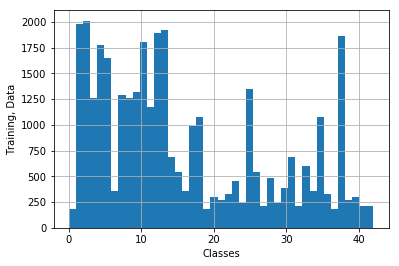

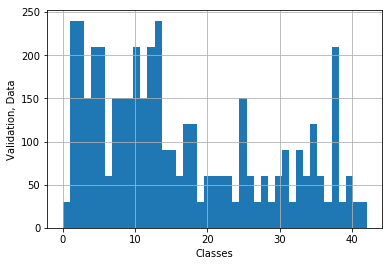

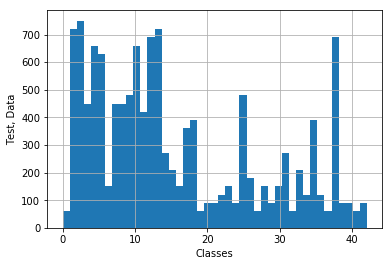

In [3]:
plt.figure()
plt.hist(y_train, bins=n_classes)
plt.xlabel('Classes')
plt.ylabel('Training, Data')
plt.grid()
plt.show()

plt.figure()
plt.hist(y_valid, bins=n_classes)
plt.xlabel('Classes')
plt.ylabel('Validation, Data')
plt.grid()
plt.show()

plt.figure()
plt.hist(y_test, bins=n_classes)
plt.xlabel('Classes')
plt.ylabel('Test, Data')
plt.grid()
plt.show()

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

2


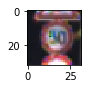

In [4]:
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
example_image = X_train[index]

plt.figure(figsize=(1,1))
plt.imshow(example_image)
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Load Labels from CSV

In [5]:
label_values = np.genfromtxt('signnames.csv', skip_header=1, dtype=[('myint','i8'), ('mysring','S55')], delimiter=',')
label_index = y_train[index]
label_description = label_values[label_index][1].decode('ascii')
print (label_description)

Speed limit (50km/h)


### Display classes

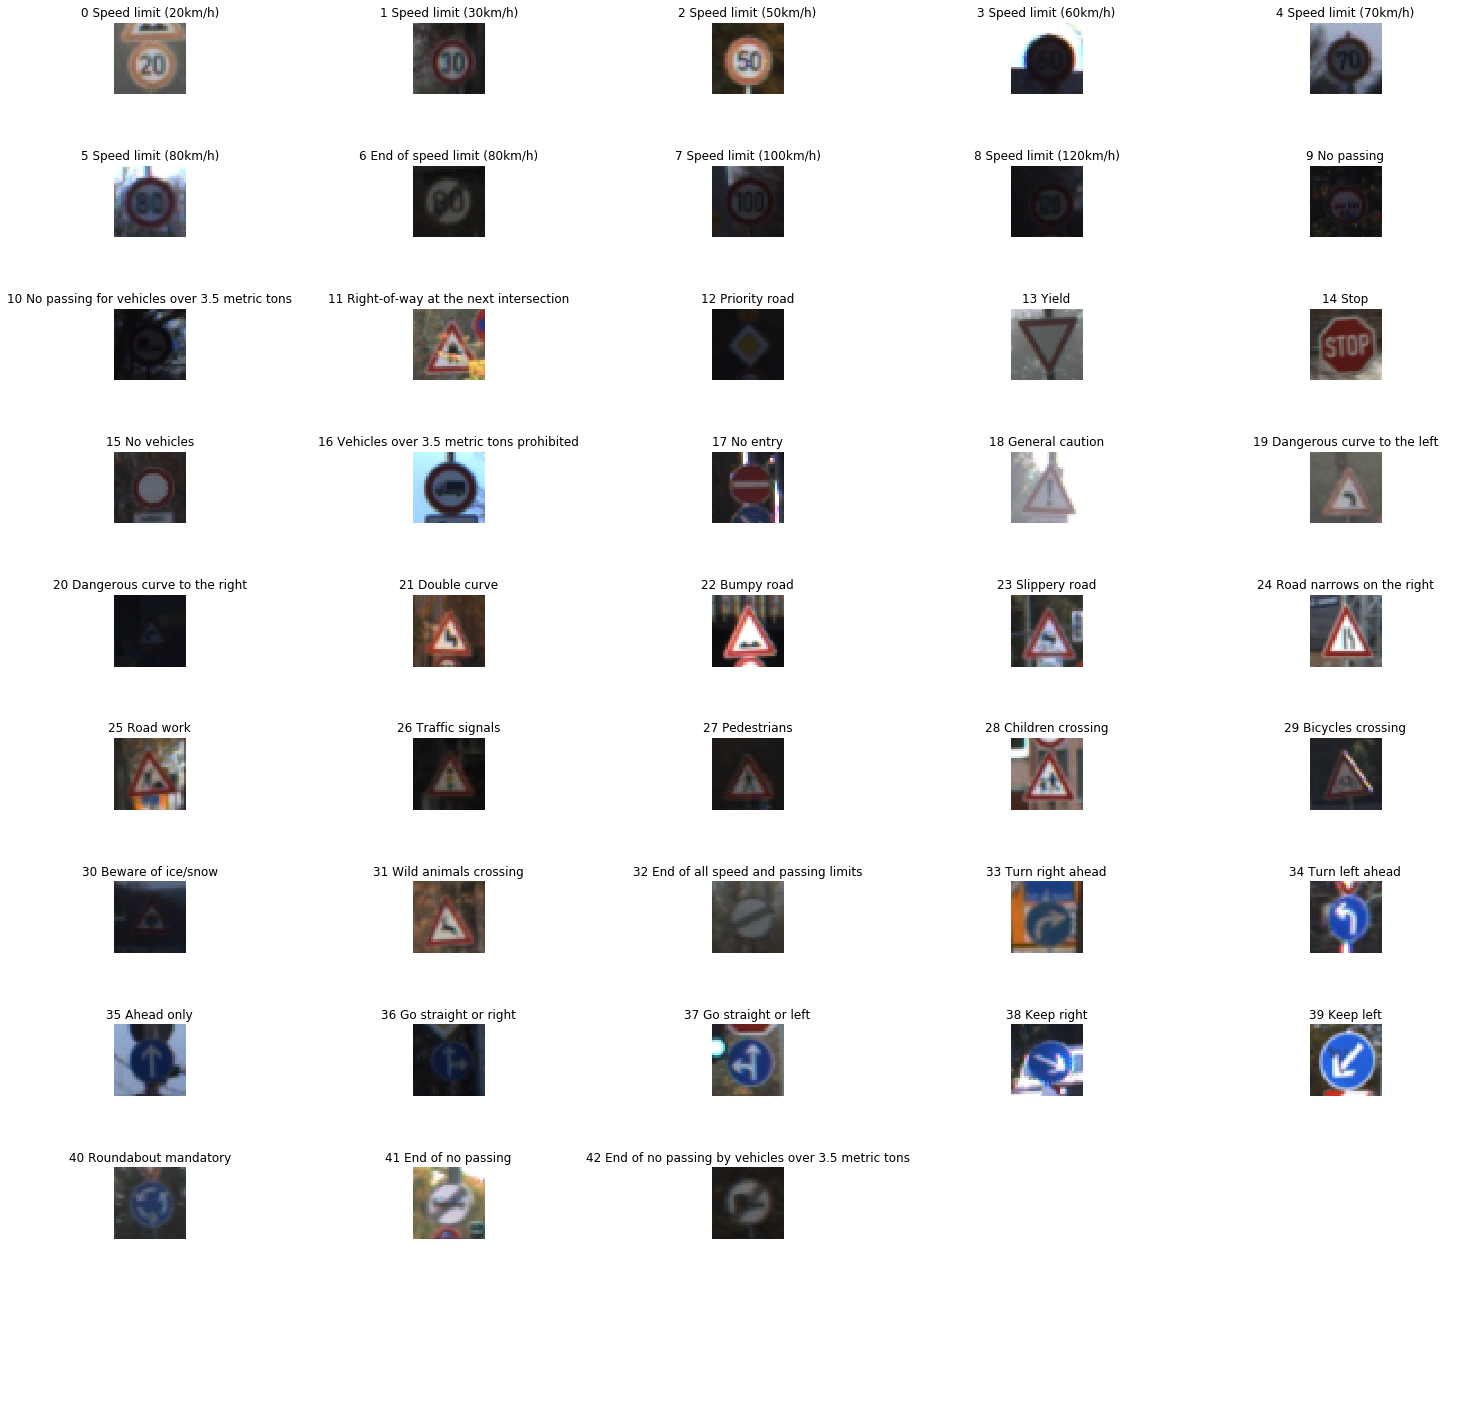

In [6]:
# show an image of the data points
fig, axs = plt.subplots(10,5, figsize=(25, 25))
fig.subplots_adjust(hspace = 1, wspace=.5)
axs = axs.ravel()
for y_class in range(n_classes):
    this_class_labels, = np.where(y_train == y_class)
    index = this_class_labels[100]
    image = X_train[index]
    axs[y_class].axis('off')
    axs[y_class].imshow(image)
    axs[y_class].set_title(str(y_class) + " " + label_values[y_class][1].decode('ascii'))
for i in range(n_classes, 50):
    axs[i].axis('off')

### Functions for data manipulation

In [7]:
"""
Implementing the pre-processing stage (III.A)
`Traffic Sign Recognition with Multi-Scale Convolutional Networks` by 
Pierre Sermanet and Yann LeCu
"""
from skimage.transform import rescale, AffineTransform, warp, resize
from skimage.color import rgb2grey
import scipy     
import math
import cv2

# increase training dataset by manipulating datasets

def yuv_to_rgb(rgb_img):
    ## YUV space 
    # Conversion matrix from rgb to yuv, transpose matrix is used to convert from yuv to rgb
    yuv_img = np.copy(rgb_img)
    dim = len(rgb_img.shape)
    if dim == 4:
        for i in range(rgb_img.shape[0]):
            bgr = cv2.cvtColor(np.uint8(rgb_img[i]), cv2.COLOR_BGR2RGB)
            yuv = cv2.cvtColor(bgr, cv2.COLOR_BGR2YUV)
            yuv_img[i] = yuv
    elif dim == 3:
            bgr = cv2.cvtColor(np.uint8(rgb_img), cv2.COLOR_BGR2RGB)
            yuv = cv2.cvtColor(bgr, cv2.COLOR_BGR2YUV)
            yuv_img = yuv
    return yuv_img

def shift_dataset(images, vector):
    dim = len(images.shape)
    if dim == 4:
        for i in range(images.shape[0]):
            im = np.copy(images[i])
            rows,cols,channel = im.shape
            M = np.float32([[1,0,vector],[0,1,vector]])
            dst = cv2.warpAffine(im,M,(cols,rows))
            images[i] = dst
    elif dim ==3:
        im = np.copy(images)
        rows,cols,channel = im.shape
        M = np.float32([[1,0,vector],[0,1,vector]])
        dst = cv2.warpAffine(im,M,(cols,rows))
        images = dst
    return images

def scale_dataset(images, val):
    for i in range(images.shape[0]):
        images[i] = scipy.ndimage.zoom(images[i], val, mode = 'constant',reshape = False)
    return images

def rotate_dataset(images, angle):
    dim = len(images.shape)
    if dim ==4:
        for i in range(images.shape[0]):
            im = np.copy(images[i])
            rows,cols,channel = im.shape
            M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
            dst = cv2.warpAffine(im,M,(cols,rows))
            images[i] = np.copy(dst)
    elif dim == 3:
        im = np.copy(images)
        rows,cols,channel = im.shape
        M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
        dst = cv2.warpAffine(im,M,(cols,rows))
        images = np.copy(dst)
    return images

def blur_dataset(images,alpha):
    dim = len(images.shape)
    if dim ==4:
        for i in range(images.shape[0]):
            im = np.copy(images[i])
            dst = cv2.blur(im,(alpha,alpha))
            images[i] = dst
    elif dim ==3:
        im = np.copy(images)
        dst = cv2.blur(im,(alpha,alpha))
        images = dst
    return images

def adjust_gamma(images, gamma=1.0):
    dim = len(images.shape)
    
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")
    
    if dim ==3:
        images = cv2.LUT(images, table)
    elif dim ==4:
        for i in range(images.shape[0]):
            im = images[i]
            im = cv2.LUT(im, table)
            images[i] = im
    return images

#### Examples of post processing

Translating Pixles by -2/2..
Rotating Pixles by +/- 15 degs..
blur.. kernel =2 
adjust brightness.. 5 


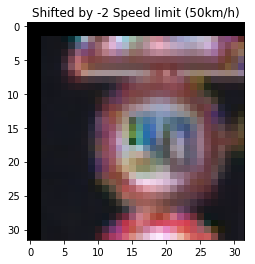

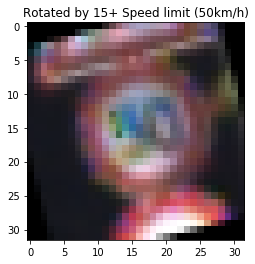

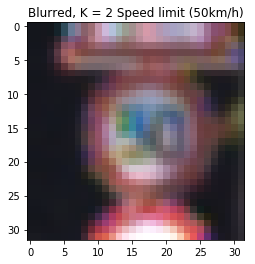

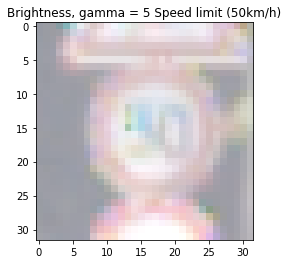

In [8]:
print("Translating Pixles by -2/2..")
# in position ([-2,2] pixels), 
shift_pos = shift_dataset(example_image, 2)
plt.figure()
plt.title('Shifted by -2 '+label_description)
plt.imshow(shift_pos)

print("Rotating Pixles by +/- 15 degs..")
# and rotation ([-15,+15] degrees). 
angle = 15
rotate_pos = rotate_dataset(example_image, angle)
plt.figure()
plt.title('Rotated by 15+ '+label_description)
plt.imshow(rotate_pos)

print("blur.. kernel =2 ")
alpha = 2
blur1 = blur_dataset(example_image, alpha)
plt.figure()
plt.title('Blurred, K = 2 '+label_description)
plt.imshow(blur1)

print("adjust brightness.. 5 ")
gamma = 5
bright = adjust_gamma(example_image, gamma)
plt.figure()
plt.title('Brightness, gamma = 5 '+label_description)
plt.imshow(bright)

#### Artificially increase size of entire dataset

In [9]:
POST_PROCESS_TRAIN_SET = True

In [10]:
if POST_PROCESS_TRAIN_SET:
    print("Translating Pixles by -2/2..")
    # in position ([-2,2] pixels), 
    shift_pos = np.copy(X_train)
    shift_neg = np.copy(X_train)
    shift_pos = shift_dataset(shift_pos, 2)
    shift_neg = shift_dataset(shift_neg, -2)


    assert(shift_pos.shape == X_train.shape)
    assert(shift_neg.shape == X_train.shape)

    X_train_manipulated = np.concatenate((X_train, shift_neg, shift_pos), axis =0)
    y_train_manipulated = np.concatenate((y_train, y_train, y_train), axis = 0)
    shift_neg = None
    shift_pos = None

    print("Translating Pixles by -5/5..")
    # in position ([-2,2] pixels), 
    shift_pos = np.copy(X_train)
    shift_neg = np.copy(X_train)
    shift_pos = shift_dataset(shift_pos, 5)
    shift_neg = shift_dataset(shift_neg, -5)
    assert(shift_pos.shape == X_train.shape)
    assert(shift_neg.shape == X_train.shape)

    X_train_manipulated = np.concatenate((X_train, shift_neg, shift_pos), axis =0)
    y_train_manipulated = np.concatenate((y_train, y_train, y_train), axis = 0)
    shift_neg = None
    shift_pos = None


    print("Rotating Pixles by +/- 15 degs..")
    # and rotation ([-15,+15] degrees). 
    angle = 15
    rotate_pos = np.copy(X_train)
    rotate_neg = np.copy(X_train)

    rotate_pos = rotate_dataset(rotate_pos, angle)
    rotate_neg = rotate_dataset(rotate_neg, -1*angle)
    assert(rotate_pos.shape == X_train.shape)
    assert(rotate_neg.shape == X_train.shape)

    X_train_manipulated = np.concatenate((X_train, rotate_neg, rotate_pos), axis =0)
    y_train_manipulated = np.concatenate((y_train, y_train, y_train), axis = 0)
    rotate_neg = None
    rotate_pos = None

    print("Rotating Pixles by +/- 5 degs..")
    # and rotation ([-15,+15] degrees). 
    angle = 5
    rotate_pos_5 = np.copy(X_train)
    rotate_neg_5 = np.copy(X_train)

    rotate_pos_5 = rotate_dataset(rotate_pos_5, angle)
    rotate_neg_5 = rotate_dataset(rotate_neg_5, -1*angle)
    assert(rotate_pos_5.shape == X_train.shape)
    assert(rotate_neg_5.shape == X_train.shape)

    X_train_manipulated = np.concatenate((X_train, rotate_neg_5, rotate_pos_5), axis =0)
    y_train_manipulated = np.concatenate((y_train, y_train, y_train), axis = 0)
    rotate_neg_5 = None
    rotate_pos_5 = None

    print("blur.. kernel =2 ")
    alpha = 2
    blur1 = np.copy(X_train)
    blur1 = blur_dataset(blur1, alpha)
    assert(blur1.shape == X_train.shape)

    print("blur.. kernel =3")
    alpha = 3
    blur2 = np.copy(X_train)
    blur2 = blur_dataset(blur2, alpha)
    assert(blur1.shape == X_train.shape)

    X_train_manipulated = np.concatenate((X_train, blur1, blur2), axis =0)
    y_train_manipulated = np.concatenate((y_train, y_train, y_train), axis = 0)
    blur1 = None
    blur2 = None
    
    print("Brighter.. gamma = 5")
    gamma = 5
    bright = np.copy(X_train)
    bright = adjust_gamma(bright, gamma)
    assert(bright.shape == X_train.shape)

    print("Darker.. gamma = 0.35")
    gamma = 0.35
    dark = np.copy(X_train)
    dark = adjust_gamma(dark, gamma)
    assert(dark.shape == X_train.shape)

    X_train_manipulated = np.concatenate((X_train, dark, bright), axis =0)
    y_train_manipulated = np.concatenate((y_train, y_train, y_train), axis = 0)
    bright = None
    dark = None

    # increase training dataset by manipulating datasets
    y_train = y_train_manipulated
    X_train = X_train_manipulated
    print("Training data shape {}".format(X_train.shape))

Translating Pixles by -2/2..
Translating Pixles by -5/5..
Rotating Pixles by +/- 15 degs..
Rotating Pixles by +/- 5 degs..
blur.. kernel =2 
blur.. kernel =3
Brighter.. gamma = 5
Darker.. gamma = 0.35
Training data shape (104397, 32, 32, 3)


#### What does the data look like now ?

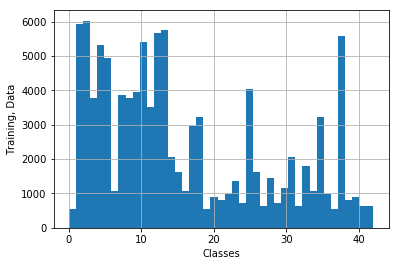

In [11]:
plt.figure()
plt.hist(y_train, bins=n_classes)
plt.xlabel('Classes')
plt.ylabel('Training, Data')
plt.grid()
plt.show()

#### Additional Data
To ensure training data is uniform accross all clases

In [12]:
# randomised jitter function 

def random_jitter(x):
    jitter_func = random.randint(1,4) 
    
    if jitter_func == 1:
        alpha = 1
        if random.random() > 0.5:
            alpha = 3
        x = blur_dataset(x, alpha)

    if jitter_func == 2:
        theta = random.random()*30 - 15  # rotate [-15,15]
        x = rotate_dataset(x, theta)
        
    if jitter_func == 3:
        dx = random.random()*20 - 10 # translate [-10,10]
        x = shift_dataset(x, dx)
        
    if jitter_func == 4:
        alpha = 0.35
        if random.random() > 0.5:
            alpha = 5
        x = adjust_gamma(x, gamma)
    return x

min_dataset = 2000

X_train_additional = np.array([])
y_train_additional = np.array([])

# for each label, create a random list of desired - current
for y_class in range(n_classes):
    this_class_labels, = np.where(y_train == y_class)
    n_this_class = this_class_labels.size
    print ("Class {} has {} data points, required is {}".format(y_class, n_this_class,min_dataset))
    if n_this_class < min_dataset:
        n_required = min_dataset - n_this_class
        # for each element, select a random jitter function
        for i in range(n_required):
            if i%100 == 0:
                print ("\tAdded {} to Class {}".format(i, y_class))
            # copy a random image from the trainig data set of this class
            rand_image_id = random.randint(0,n_this_class-1)
            rand_image = np.copy(X_train[rand_image_id])
            # apply random transform
            rand_image = random_jitter(rand_image)            
            if X_train_additional.size ==0:
                X_train_additional = np.array([rand_image])
                y_train_additional = np.array([y_class])
            else:
                X_train_additional = np.concatenate((X_train_additional, np.array([rand_image])), axis =0)
                y_train_additional = np.concatenate((y_train_additional, np.array([y_class])), axis = 0)
                

Class 0 has 540 data points, required is 2000
	Added 0 to Class 0
	Added 100 to Class 0
	Added 200 to Class 0
	Added 300 to Class 0
	Added 400 to Class 0
	Added 500 to Class 0
	Added 600 to Class 0
	Added 700 to Class 0
	Added 800 to Class 0
	Added 900 to Class 0
	Added 1000 to Class 0
	Added 1100 to Class 0
	Added 1200 to Class 0
	Added 1300 to Class 0
	Added 1400 to Class 0
Class 1 has 5940 data points, required is 2000
Class 2 has 6030 data points, required is 2000
Class 3 has 3780 data points, required is 2000
Class 4 has 5310 data points, required is 2000
Class 5 has 4950 data points, required is 2000
Class 6 has 1080 data points, required is 2000
	Added 0 to Class 6
	Added 100 to Class 6
	Added 200 to Class 6
	Added 300 to Class 6
	Added 400 to Class 6
	Added 500 to Class 6
	Added 600 to Class 6
	Added 700 to Class 6
	Added 800 to Class 6
	Added 900 to Class 6
Class 7 has 3870 data points, required is 2000
Class 8 has 3780 data points, required is 2000
Class 9 has 3960 data point

#### What does the data look like now ?

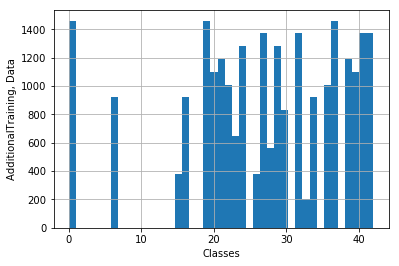

In [13]:
plt.figure()
plt.hist(y_train_additional, bins=n_classes)
plt.xlabel('Classes')
plt.ylabel('AdditionalTraining, Data')
plt.grid()
plt.show()

#### Add to current dataset

In [14]:
X_train = np.concatenate((X_train, X_train_additional), axis =0)
y_train = np.concatenate((y_train, y_train_additional), axis = 0)

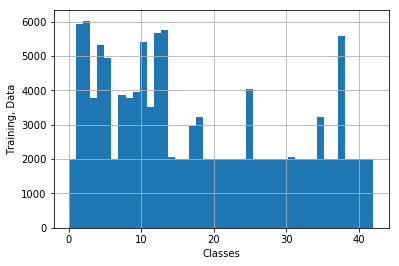

In [15]:
plt.figure()
plt.hist(y_train, bins=n_classes)
plt.xlabel('Classes')
plt.ylabel('Training, Data')
plt.grid()
plt.show()

#### Grayscale

In [16]:
# Convert to grayscale
X_train_rgb = X_train
X_train_gry = np.sum(X_train/3, axis=3, keepdims=True)
X_valid_rgb = X_valid
X_valid_gry = np.sum(X_valid/3, axis=3, keepdims=True)
X_test_rgb = X_test
X_test_gry = np.sum(X_test/3, axis=3, keepdims=True)

print('RGB shape:', X_train_rgb.shape)
print('Grayscale shape:', X_train_gry.shape)

X_train = X_train_gry
X_valid = X_valid_gry
X_test = X_test_gry

RGB shape: (129180, 32, 32, 3)
Grayscale shape: (129180, 32, 32, 1)


#### Normalise and Zero Center

In [17]:
def normalize(image_data, max_val = 255, min_val = 0):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    normalised_img = a + ( ( (image_data - min_val)*(b - a) )/( max_val - min_val))
    return normalised_img

def zero_center(normalised_img):
  
    centred_img = normalised_img - 0.5
    return centred_img

def norm_zero(img):
    norm_img = (img-128)/128.0
    return norm_img

# normalise to 0-1 range
print("Test max: {}, min: {}".format(np.max(X_test),np.min(X_test)))
print("Train max: {}, min: {}".format(np.max(X_train),np.min(X_train)))
print("Valid max: {}, min: {}".format(np.max(X_valid),np.min(X_valid)))

print("Normalising Dataset..")
X_test = norm_zero(X_test)
X_train = norm_zero(X_train)
X_valid = norm_zero(X_valid)
print("Test max: {}, min: {}".format(np.max(X_test),np.min(X_test)))
print("Train max: {}, min: {}".format(np.max(X_train),np.min(X_train)))
print("Valid max: {}, min: {}".format(np.max(X_valid),np.min(X_valid)))

Test max: 255.0, min: 4.0
Train max: 255.0, min: 0.0
Valid max: 255.0, min: 5.0
Normalising Dataset..
Test max: 0.9921875, min: -0.96875
Train max: 0.9921875, min: -1.0
Valid max: 0.9921875, min: -0.9609375


### Model Architecture

In [32]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten


def LeNet(x, keepprob = 0.6):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
     # Layer 1: Convolutional. Input = 32x32x1. Output = 30x30x16.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 16), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(16))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1   = tf.nn.relu(conv1)

    # Layer 2: Convolutional. Output = 28x28x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2   = tf.nn.relu(conv2)

    # Pooling. Input = 28x28x32. Output = 14x14x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2 = tf.nn.dropout(conv2, keep_prob = keepprob)

    # Layer 3: Convolutional. Input = 14x14x32. Output = 12x12x64
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 64), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(64))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    conv3   = tf.nn.relu(conv3)

    # Layer 4: Convolutional. Input = 12x12x64. Output = 10x10x64
    conv4_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 64), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(64))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='VALID') + conv4_b
    conv4   = tf.nn.relu(conv4)

    # Pooling. Input = 10x10x64. Output = 5x5x64.
    conv4 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv4 = tf.nn.dropout(conv4, keep_prob = keepprob)

    # Layer 5: Convolutional. Intput = 5x5x64. Output = 3x3x128
    conv5_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 128), mean = mu, stddev = sigma))
    conv5_b = tf.Variable(tf.zeros(128))
    conv5   = tf.nn.conv2d(conv4, conv5_W, strides=[1, 1, 1, 1], padding='VALID') + conv5_b
    conv5   = tf.nn.relu(conv5)

    # Flatten. Input = 3x3x128. Output = 1152.
    fc0   = flatten(conv5)

    # Layer 6: Fully Connected. Input = 1152. Output = 1024.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1152, 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # Activation.
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob = keepprob)

    # Layer 7: Fully Connected. Input = 1024. Output = 1024.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 1024), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(1024))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # Activation.
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob = keepprob)

    # Layer 8: Fully Connected. Input = 1024. Output = 43.
    fc3_W       = tf.Variable(tf.truncated_normal(shape=(1024, 43), mean = mu, stddev = sigma))
    fc3_b       = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    tf_activations = [conv1, conv2, conv3, conv4, conv5, fc1, fc2]
    return logits, tf_activations

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [19]:
from sklearn.utils import shuffle

# place holders
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

### Training pipeline
rate = 0.001

EPOCHS = 15
BATCH_SIZE = 128

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

# Adam optimiser is a modified SGD algorithm with modified training rate
optimizer = tf.train.AdamOptimizer(learning_rate = rate)

training_operation = optimizer.minimize(loss_operation)

### Calculate and report the accuracy on the training and validation set.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

    

# Run Session

In [20]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './traffic_sign_lenet')
    print("Model saved")

Training...
EPOCH 1 ...
Validation Accuracy = 0.841

EPOCH 2 ...
Validation Accuracy = 0.924

EPOCH 3 ...
Validation Accuracy = 0.934

EPOCH 4 ...
Validation Accuracy = 0.951

EPOCH 5 ...
Validation Accuracy = 0.950

EPOCH 6 ...
Validation Accuracy = 0.952

EPOCH 7 ...
Validation Accuracy = 0.956

EPOCH 8 ...
Validation Accuracy = 0.961

EPOCH 9 ...
Validation Accuracy = 0.956

EPOCH 10 ...
Validation Accuracy = 0.963

EPOCH 11 ...
Validation Accuracy = 0.962

EPOCH 12 ...
Validation Accuracy = 0.965

EPOCH 13 ...
Validation Accuracy = 0.963

EPOCH 14 ...
Validation Accuracy = 0.967

EPOCH 15 ...
Validation Accuracy = 0.965

Model saved


### Test Performance

In [21]:
## Once a final model architecture is selected, 
## the accuracy on the test set should be calculated and reported as well.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.939


Great: Test Result is **93.4%**

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [22]:
import scipy
from os import listdir
import cv2
import numpy as np
### Load the images and plot them here.
X_online = np.array([])

files = [f for f in listdir('online_test') if '.ppm' in f]

n_online = len(files)

for file in files:
    image = scipy.ndimage.imread('online_test/'+file)
    image = cv2.resize(image, (32, 32)).astype(np.float32) 
    if X_online.size == 0:
        X_online = np.array([image])
        
    else:
        X_online = np.concatenate((X_online, np.array([image])), axis =0)
        
# preprocess
X_original = np.copy(X_online)
X_online_gray = np.sum(X_online/3, axis=3, keepdims=True)
X_online = norm_zero(X_online_gray)

# manually set based on csv       
y_online = np.array([35, 7, 25, 5, 40])


### Predict the Sign Type for Each Image

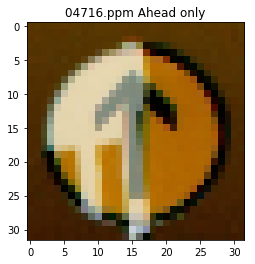

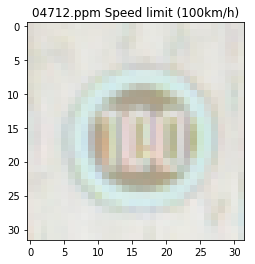

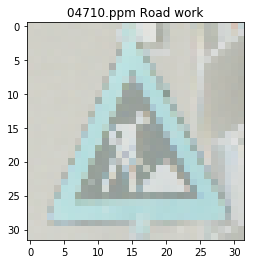

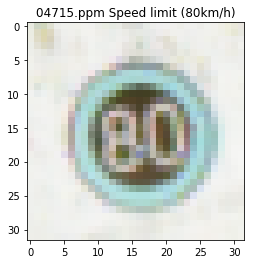

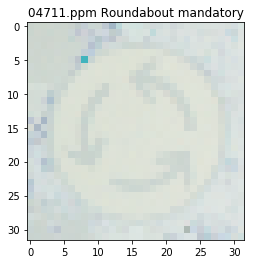

In [24]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    y_predict = sess.run(tf.argmax(logits, 1), feed_dict={x: X_online})
    
for i, n in zip(y_predict, range(n_online)):
    plt.figure()
    plt.imshow(X_original[n], cmap='gray')
    plt.title(str(files[n]) +" "+ str(label_values[i][1].decode('ascii')))


### Analyze Performance

In [25]:
pass_fail, = np.where(y_online == y_predict)
Test_accuracy = pass_fail.size / n_online
print ("German traffic sign images dataset accuracy {}".format(Test_accuracy))

German traffic sign images dataset accuracy 1.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [26]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    y_predict = sess.run(tf.nn.softmax(logits), feed_dict={x: X_online})
    top_signs = sess.run(tf.nn.top_k(y_predict, k =5))
print (top_signs)

TopKV2(values=array([[  9.99999881e-01,   1.44803991e-07,   2.02268033e-08,
          1.09562492e-09,   1.03746664e-10],
       [  9.99243617e-01,   7.01303477e-04,   4.45199294e-05,
          7.24430993e-06,   2.98628379e-06],
       [  1.00000000e+00,   6.75488817e-16,   6.54541375e-16,
          8.92602327e-18,   8.24345286e-18],
       [  9.99999881e-01,   6.71082816e-08,   2.75838712e-08,
          9.60035340e-09,   2.30458777e-11],
       [  6.48244202e-01,   3.50347072e-01,   8.72016186e-04,
          3.19259765e-04,   7.31308683e-05]], dtype=float32), indices=array([[35, 15, 33, 26, 34],
       [ 7,  8, 40,  1,  5],
       [25, 30, 26, 36, 28],
       [ 5,  1,  2,  3,  8],
       [12, 40, 11, 30, 26]], dtype=int32))


#### Visualise Softmax

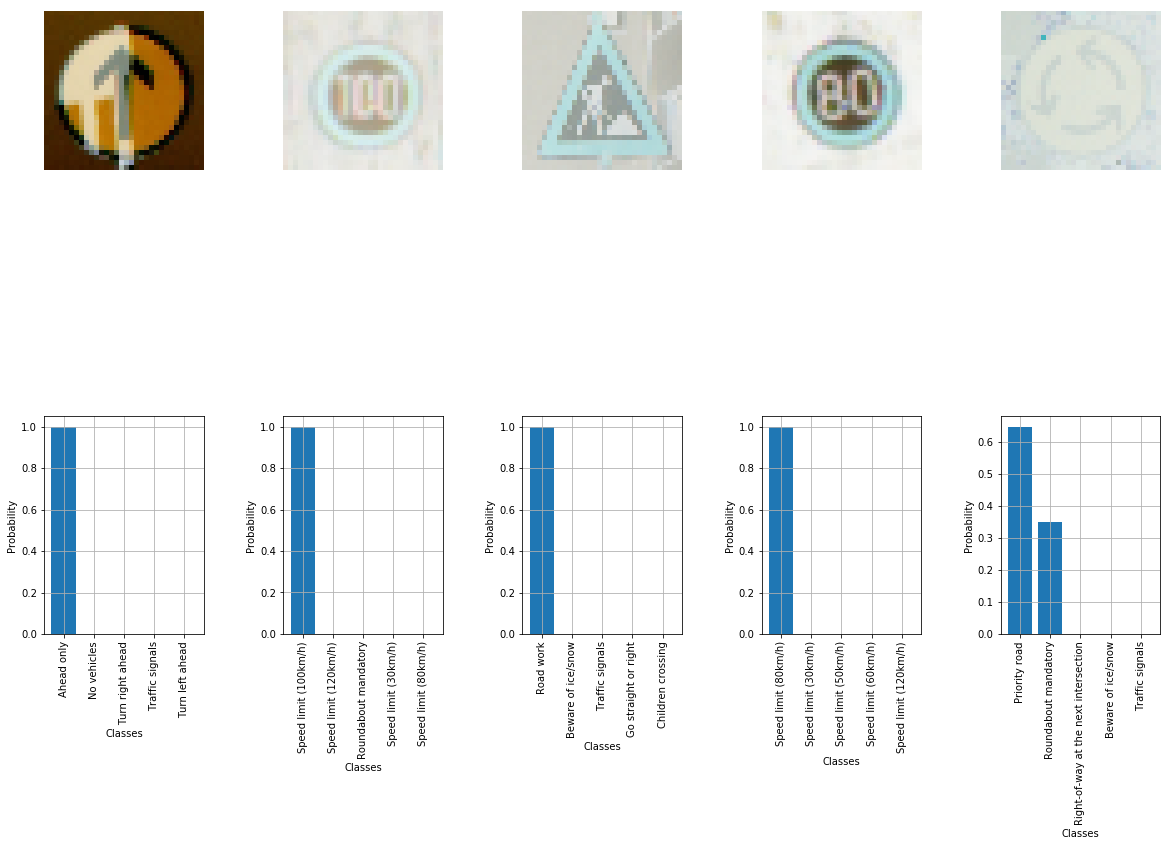

In [27]:
fig, ax = plt.subplots(2,5, figsize=(20, 12))
fig.subplots_adjust(hspace = 1, wspace=.5)
ax = ax.ravel()
for i in range(5):
    image = X_original[i]
    ax[i].axis('off')
    ax[i].imshow(X_original[i])
    ax[i+5].bar(range(0,5),top_signs.values[i])
    labels = []
    for j in top_signs.indices[i]:
        labels.append(str(label_values[j][1].decode('ascii')))
    ax[i+5].grid()
    ax[i+5].set_xticks(range(0,5))
    ax[i+5].set_xlabel('Classes')
    ax[i+5].set_ylabel('Probability')
    ax[i+5].set_xticklabels(labels)
    for tick in ax[i+5].get_xticklabels():
        tick.set_rotation(90)

                         
plt.show()   

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [33]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry
def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [34]:
tf_activations = [conv1, conv2, conv3, conv4, conv5, fc1, fc2, logits]
image_input = X_original[0]

for (layer, i) in zip(tf_activations, range(len(tf_activations))):
    outputFeatureMap(image_input, layer, activation_min=-1, activation_max=-1 ,plt_num=1)

NameError: name 'conv1' is not defined